In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the California housing dataset
california = fetch_california_housing(as_frame=True)
X = california.data  # Features
y_regression = california.target  # Target variable for regression

# Convert the regression target into a binary classification target for logistic regression
median_value = np.median(y_regression)
y_classification = (y_regression > median_value).astype(int)  # 1 if above median, 0 otherwise

# Split the data for regression and classification
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Logistic Regression ----
print("Logistic Regression:")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_class_train)
y_class_pred = logistic_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_class_test, y_class_pred))
print()

# ---- Ridge Regression ----
print("Ridge Regression:")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_reg_train)
y_ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_reg_test, y_ridge_pred)
ridge_r2 = r2_score(y_reg_test, y_ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Ridge Regression R^2 Score: {ridge_r2:.2f}")
print()

# ---- Lasso Regression ----
print("Lasso Regression:")
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_reg_train)
y_lasso_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_reg_test, y_lasso_pred)
lasso_r2 = r2_score(y_reg_test, y_lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")
print(f"Lasso Regression R^2 Score: {lasso_r2:.2f}")
print()

# ---- Linear Regression ----
print("Linear Regression:")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_reg_train)
y_linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_reg_test, y_linear_pred)
linear_r2 = r2_score(y_reg_test, y_linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")
print(f"Linear Regression R^2 Score: {linear_r2:.2f}")


Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.82      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128


Ridge Regression:
Ridge Regression MSE: 0.56
Ridge Regression R^2 Score: 0.58

Lasso Regression:
Lasso Regression MSE: 0.68
Lasso Regression R^2 Score: 0.48

Linear Regression:
Linear Regression MSE: 0.56
Linear Regression R^2 Score: 0.58


Confusion Matrix for Logistic Regression:


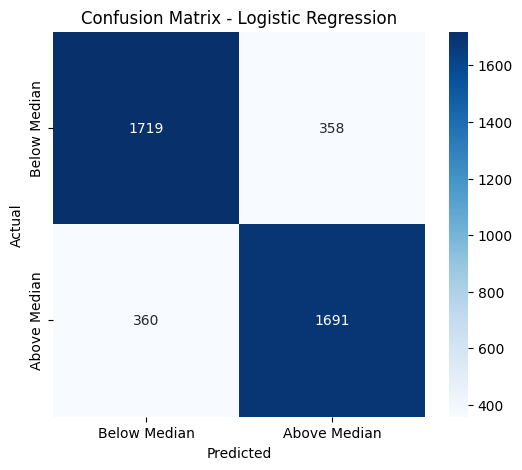

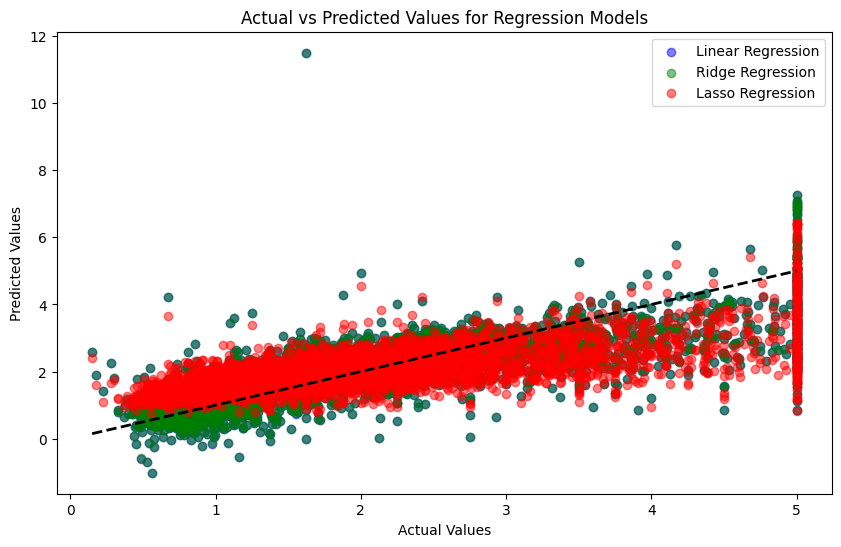

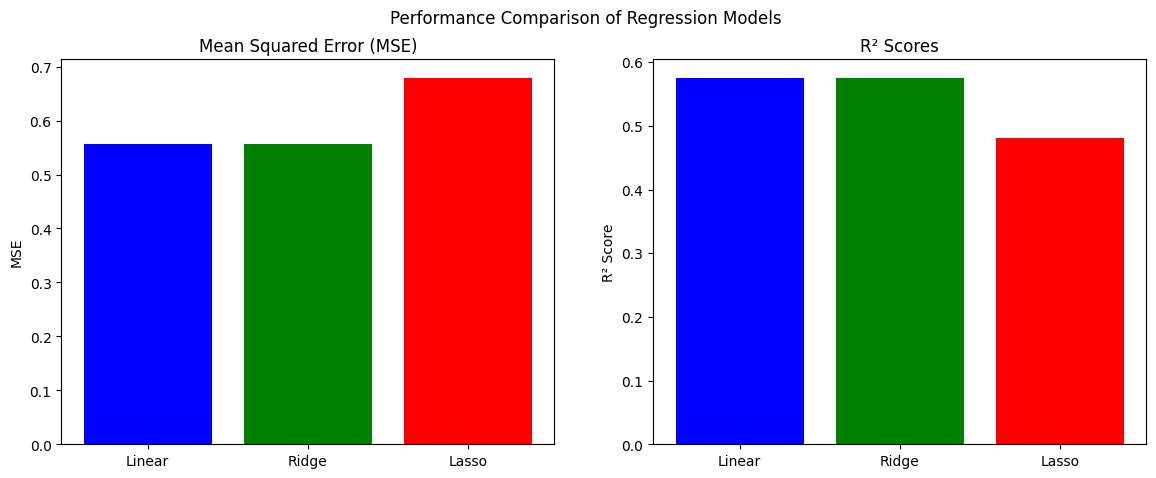

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ---- Logistic Regression Visualization ----
print("Confusion Matrix for Logistic Regression:")
conf_matrix = confusion_matrix(y_class_test, y_class_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Below Median", "Above Median"], 
            yticklabels=["Below Median", "Above Median"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- Regression Models Visualization ----
# Scatter plot for predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_linear_pred, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_reg_test, y_ridge_pred, alpha=0.5, label='Ridge Regression', color='green')
plt.scatter(y_reg_test, y_lasso_pred, alpha=0.5, label='Lasso Regression', color='red')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted Values for Regression Models")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Bar plot for MSE and R² scores
mse_scores = [linear_mse, ridge_mse, lasso_mse]
r2_scores = [linear_r2, ridge_r2, lasso_r2]
model_names = ['Linear', 'Ridge', 'Lasso']

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# MSE bar plot
ax[0].bar(model_names, mse_scores, color=['blue', 'green', 'red'])
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

# R² score bar plot
ax[1].bar(model_names, r2_scores, color=['blue', 'green', 'red'])
ax[1].set_title('R² Scores')
ax[1].set_ylabel('R² Score')

plt.suptitle("Performance Comparison of Regression Models")
plt.show()


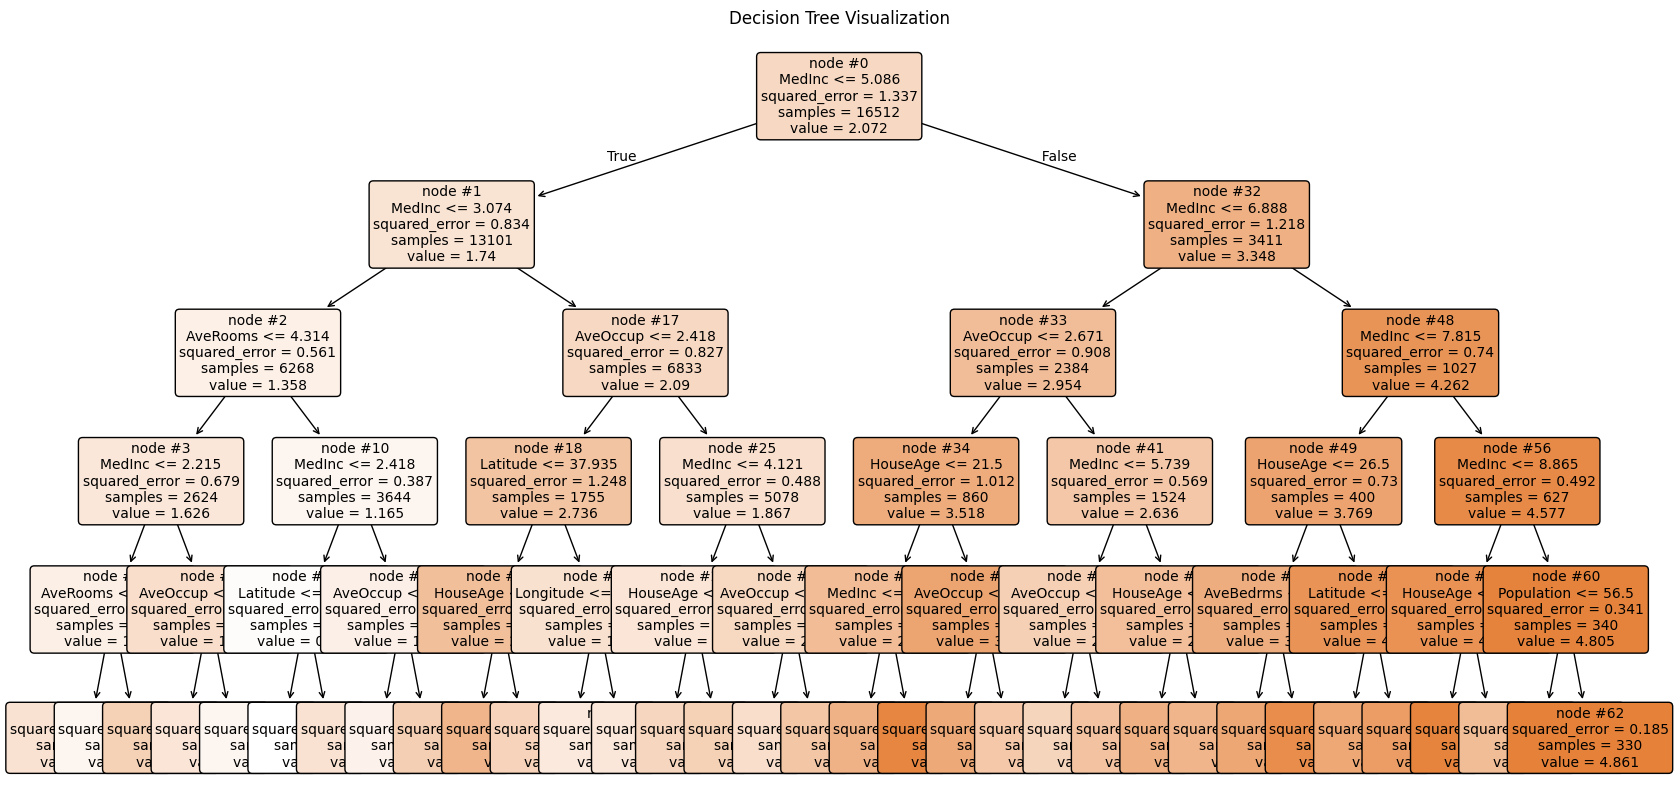

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# ---- Decision Tree Regressor ----
# Train a Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree_model.fit(X_train, y_reg_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_model,
    feature_names=california.feature_names,
    filled=True,
    rounded=True,
    fontsize=10,
    node_ids=True,
)
plt.title("Decision Tree Visualization")
plt.show()


In [4]:
%matplotlib inline


In [ ]:
!pip install xgboost


XGBoost Regression MSE: 0.23
XGBoost Regression R² Score: 0.83


<Figure size 1000x600 with 0 Axes>

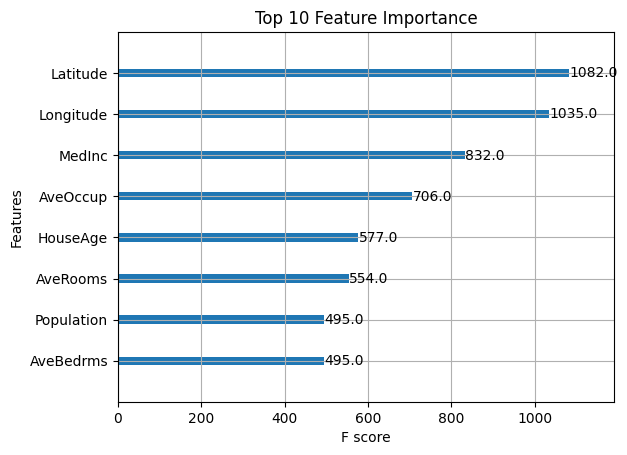

In [7]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---- Load and Split Data ----
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
X = california.data  # Features
y = california.target  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- XGBoost Regression ----
# Convert datasets into DMatrix, the optimized data structure for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,                  # Maximum depth of trees
    'eta': 0.1,                      # Learning rate
    'eval_metric': 'rmse',           # Evaluation metric
    'seed': 42                       # Random seed for reproducibility
}

# Train the model
xgboost_model = xgb.train(params, dtrain, num_boost_round=100)

# ---- Predictions and Evaluation ----
# Make predictions
y_pred = xgboost_model.predict(dtest)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Regression MSE: {mse:.2f}")
print(f"XGBoost Regression R² Score: {r2:.2f}")

# ---- Feature Importance Visualization ----
# Plot feature importance
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
xgb.plot_importance(xgboost_model, importance_type='weight', max_num_features=10, title='Top 10 Feature Importance')
plt.show()  # Ensure that the plot is displayed
